# **[개념정리]**

## 01. 분류의 개요
-- 학습 데이터로 주어진 데이터의 피처와 레이블값으 머신러닝 알고리즘으로 학습해 모델을 생성하고, 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

-- 베이즈 통계, 로지스틱 회귀, 결정 트리 등

### {앙상블}
-- 배깅

-- 부스팅

-- 결정 트리 : 기본으로 사용하는 알고리즘 (매우 쉽고 유연하게 적용될 수 있는 알고리즘이나 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합이 발생하여 반대로 예측 성능이 저하될 수 있다는 단점이 존재. 그러나 이 단점이 앙상블 기법에서는 확률적 보완과 오류가 발생한 부분에 대한 가중치를 게속 업데이트하면서 예측 성능을 향상시키는 등의 장점으로 작용)



---



## 02. 결정 트리
-- 데이터에 있는 규칙을 학습을 통해 자동으로 찾앙내 트리 기반의 분류 규칙을 만드는 것

-- 루트 노드


-- 규칙 노드 : 규칙의 조건. 규칙의 조건이 만들어질 때마다 형성됨. 그러나 많아질 수록 과적합으로 이어질 수 있음. 결과적으로 결정 트리의 예측 성능이 저하될 수 있는 것.
- 최대한 균일한 데이터 세트를 구성해 분할하여 최대한 많은 데이터 세트가 특정 분류에 속하도록 해야 함.
- 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만들어야 함. (엔트로피를 이용한 정보이득지수와 지니계수로 균일도를 측정하기. 정보이득지수가 높을수록, 지니계수가 낮을수록 데이터 균일도가 good)
- DecisionTreeClassifier : 지니계수를 이용하여 데이터를 분할.

-- 리프 노드 : 결정된 클래스의 값

-- 서브 트리 : 새로운 조건마다 형성됨





### {결정 트리 모델의 특징}

-- 균일도라는 룰을 기반으로 하고 있어 알고리즘이 쉽고 직관적

-- 전처리 작업이 필요 없음

-- 대신 과적합으로 인한 정확도가 떨어짐

### {결정 트리 파라미터}

-- max_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes etc

### {결정 트리 모델의 시각화}

-- Graphviz 패키지 사용

-- 사이킷런에서는 export_graphviz() : 인자에 학습이 완료된 estimator, output 파일명, 결정 클래스 명칭, 피처의 명칭을 입력

-- 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어감 - 과적합

-- 대부분의 파라미터는 복잡한 트리를 방지하기 위한 목적의 파라미터에 해당

-- max_depth에 제한을 주면 더 간단한 결정 트리가 만들어진다.

-- 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요하게 작용. - 중요한 몇개의 피처가 명확한 규칙 트리 생성에 중요한 역할을 함.

### {결정 트리 과적합}
-- 하이퍼 파라미터가 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡

-- 데이터 세트의 특성과 조금만 다르게 예측하더라도 예측 정확도 down


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

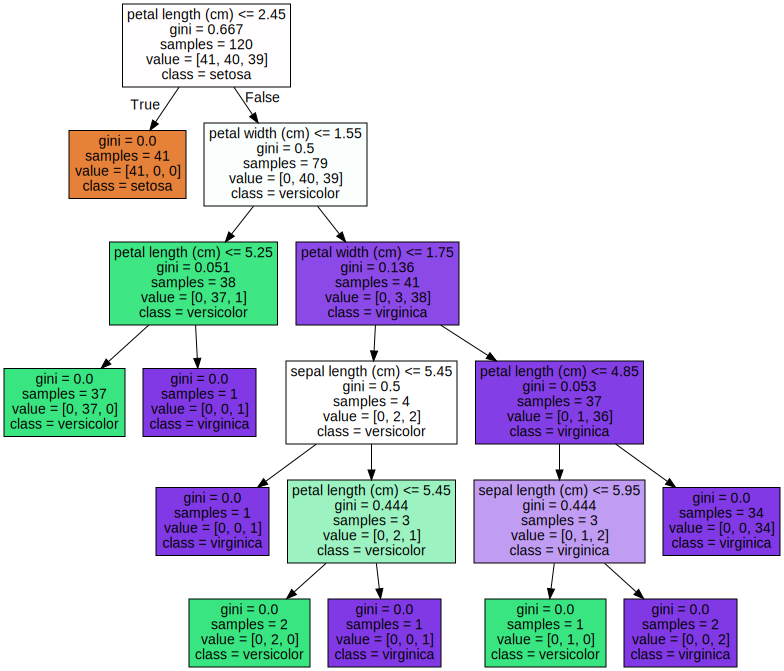

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

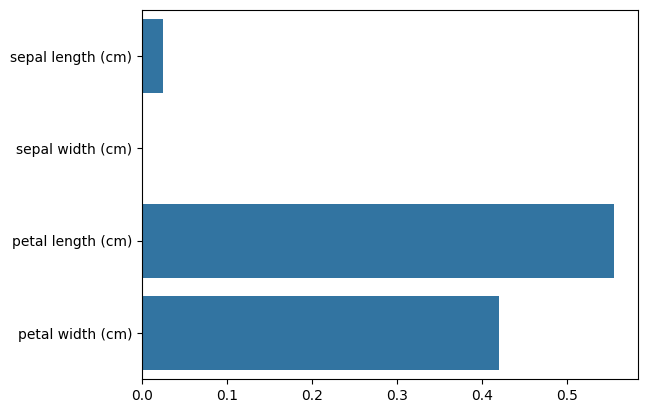

In [ ]:
from ast import increment_lineno
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importance:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name,value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

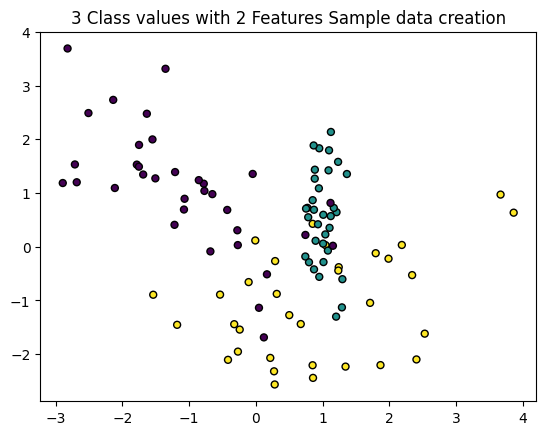

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1],marker='o', c=y_labels, s=25, edgecolor='k')

In [ ]:
import numpy as np

def visualize_boundary(model, X, y):

  fig,ax = plt.subplots()

  ax.scatter(X[:,0],X[:,1],c=y,s=25,cmap='rainbow',edgecolor='k',clim=(y.min(),y.max()),zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start,xlim_end=ax.get_xlim()
  ylim_start,ylim_end=ax.get_ylim()

  model.fit(X,y)
  xx,yy=np.meshgrid(np.linspace(xlim_start,xlim_end,num=200),np.linspace(ylim_start,ylim_end,num=200))
  Z=model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

  n_classes=len(np.unique(y))
  contours=ax.contour(xx,yy,Z,alpha=0.3,levels=np.arange(n_classes+1)-0.5,cmap='rainbow',clim=(y.min(),y.max()),zorder=1)

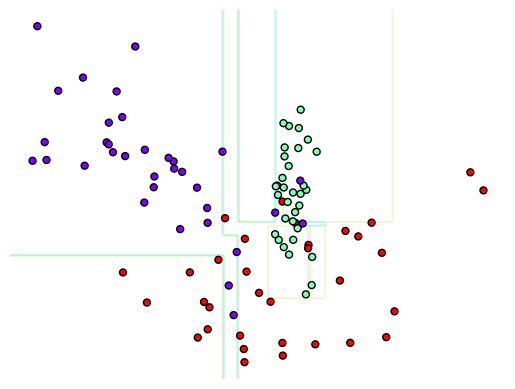

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

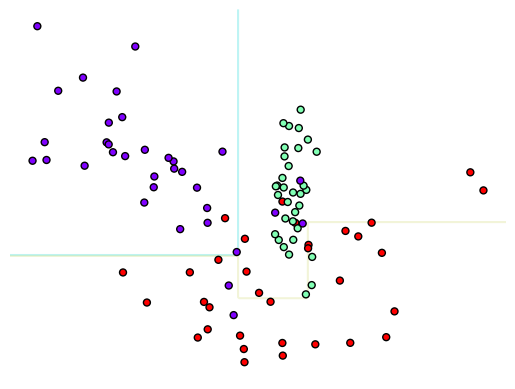

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving features.txt to features (2).txt


In [ ]:
from ast import increment_lineno
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                              if x[1] > 0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving y_train.txt to y_train (2).txt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving y_test.txt to y_test (2).txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path1 = '/content/drive/MyDrive/X_train.txt'
with open(file_path1,'r') as file:
  data = file.read()

In [ ]:
file_path2 = '/content/drive//MyDrive/X_test.txt'
with open(file_path2,'r') as file:
  data = file.read()

In [ ]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('features.txt', sep='\s+',
                                header=None, names=['column_index','column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
  X_train = pd.read_csv(file_path1, sep='\s+', header=None, names=feature_name)
  X_test = pd.read_csv(file_path2,sep='\s+', header=None, names=feature_name)

  # 학습 레이블 데이터세트와 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train , X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6,8,10,12,16,20,24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [ ]:
max_depths = [6,8,10,12,16,20,24]

# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth={0} 정확도: {1:.4f}'.format(depth,accuracy))

max_depth=6 정확도: 0.8551
max_depth=8 정확도: 0.8717
max_depth=10 정확도: 0.8599
max_depth=12 정확도: 0.8571
max_depth=16 정확도: 0.8599
max_depth=20 정확도: 0.8565
max_depth=24 정확도: 0.8565


In [40]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [38]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


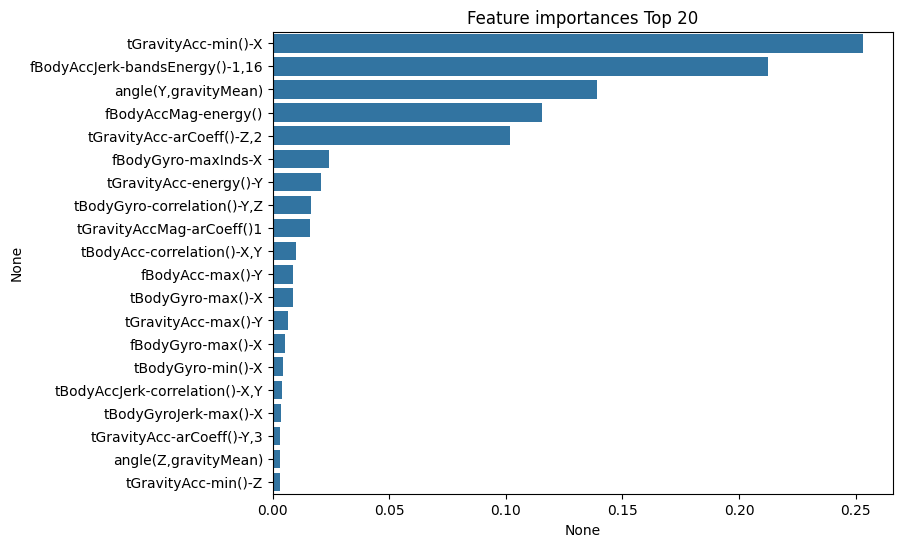

In [39]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# top 중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()